In [1]:
import pandas as pd

data=pd.read_csv('lyric_nouns.tsv', sep='\t', encoding = 'utf-8')
data.head()

,년도,가수,제목,장르,가사
0,19920000,잼,난 멈추지 않는다,댄스,"['이제', '다시', '시작', '내겐', '시간', '때론', '상처', '좌절..."
1,19920000,잼,우리 모두 사랑하자,댄스,"['모두', '사랑', '위', '모두', '춤', '인', '스텝', '속', '..."
2,19920000,잼,이유,발라드,"['어둠', '이제', '시간', '가슴속', '긴머리', '향', '향기', '잠..."
3,19920000,잼,18번가의 비밀,댄스,"['어둠', '속', '느낌', '거리', '비', '해지', '바람', '어깨',..."
4,19920000,잼,요즘 친구들,댄스,"['요즘', '친구', '흥', '정말', '친구', '말로', '자기', '다만'..."


In [2]:
lyric = data['가사']
print(len(lyric))
lyric.head()

5773


0    ['이제', '다시', '시작', '내겐', '시간', '때론', '상처', '좌절...
1    ['모두', '사랑', '위', '모두', '춤', '인', '스텝', '속', '...
2    ['어둠', '이제', '시간', '가슴속', '긴머리', '향', '향기', '잠...
3    ['어둠', '속', '느낌', '거리', '비', '해지', '바람', '어깨',...
4    ['요즘', '친구', '흥', '정말', '친구', '말로', '자기', '다만'...
Name: 가사, dtype: object

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans

In [4]:
#TF-IDF vectorizer
tfv = TfidfVectorizer()
#transform
vec_text = tfv.fit_transform(lyric)
print(vec_text)

  (0, 6849)	0.3425151389188998
  (0, 6613)	0.18436352018582902
  (0, 6009)	0.44290019879366677
  (0, 8885)	0.3042868799725523
  (0, 11415)	0.0947004109715076
  (0, 1432)	0.11729757800911624
  (0, 8697)	0.18272779241114584
  (0, 5086)	0.09571718660144826
  (0, 2477)	0.12239621111522361
  (0, 5877)	0.17723540535109103
  (0, 1472)	0.28340004319860956
  (0, 5946)	0.42586361327845274
  (0, 1806)	0.31408219234462065
  (0, 7861)	0.296560311729245
  (1, 1206)	0.13052906018326857
  (1, 9589)	0.06308760850268687
  (1, 1936)	0.10317031558347337
  (1, 9330)	0.13190661032987788
  (1, 7785)	0.0949355890399528
  (1, 8100)	0.13874203316026842
  (1, 3635)	0.1367835475942323
  (1, 2025)	0.14093143375134082
  (1, 7065)	0.04558847338613197
  (1, 878)	0.090748610501516
  (1, 8129)	0.10924285941653497
  :	:
  (5771, 4872)	0.19886141766892115
  (5771, 3315)	0.05919046119371655
  (5771, 5086)	0.0862419558575344
  (5772, 1213)	0.46257148421046845
  (5772, 6137)	0.14721914632116365
  (5772, 3067)	0.111466349823

In [14]:
words = tfv.get_feature_names()

In [5]:
print(len(tfv.idf_))
tfv.idf_

11548


array([7.71521021, 6.32891585, 8.96797318, ..., 6.66538809, 8.96797318,
       8.96797318])

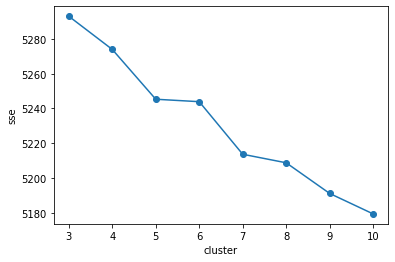

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

def elbow(x):
    sse=[]
    for i in range(3,11):
        kmeans = KMeans(n_clusters = i, init='k-means++', random_state=0)
        kmeans.fit(vec_text)
        sse.append(kmeans.inertia_)
    
    plt.plot(range(3,11), sse, marker='o')
    plt.xlabel('cluster')
    plt.ylabel('sse')
    plt.show()
        
elbow(vec_text)

In [7]:
#setup kmeans clustering
kmeans = KMeans(n_clusters = 5, init='random', random_state=2)
#fit the data 
kmeans = kmeans.fit(vec_text)

In [8]:
labels=kmeans.labels_
print(labels)
print(len(labels))

[0 2 3 ... 0 4 4]
5773


In [9]:
clustered=pd.DataFrame(list(zip(data['가수'],data['제목'],labels)),columns=['singer','title','cluster'])

In [10]:
clustered

,singer,title,cluster
0,잼,난 멈추지 않는다,0
1,잼,우리 모두 사랑하자,2
2,잼,이유,3
3,잼,18번가의 비밀,3
4,잼,요즘 친구들,4
5,잼,싫증,4
6,서태지와 아이들,난 알아요,0
7,서태지와 아이들,이밤이 깊어가지만,0
8,서태지와 아이들,너와 함께한 시간속에서,0
9,노이즈,너에게 원한건,4


In [12]:
clustered.to_csv('clustered.tsv', index=False, sep='\t')

In [15]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : 다시, 눈물, 사랑, 기억, 이제, 시간, 생각, 모습, 추억, 마음
1 : 나나, 사랑, 라라라라, 사람, 자꾸, 난나, 나빌레, 마음, 오늘, 동경
2 : 사랑, 사람, 눈물, 가슴, 마음, 이별, 이제, 다시, 하나, 세상
3 : 세상, 모든, 순간, 모두, 지금, 하나, 시간, 이제, 마음, 사랑
4 : 사랑, 오늘, 생각, 마음, 지금, 자꾸, 매일, 정말, 이제, 그냥


In [16]:
clustered.groupby('cluster').count()

,singer,title
cluster,,
0,970,970
1,60,60
2,938,938
3,1034,1034
4,2771,2771


In [17]:
kmeans.cluster_centers_

array([[1.77988982e-04, 2.10518047e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.04976135e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.26505247e-04, 1.98339945e-04, ...,
        4.22688202e-04, 0.00000000e+00, 0.00000000e+00],
       [4.19019391e-04, 1.16470434e-03, 0.00000000e+00, ...,
        7.59548468e-04, 6.38112757e-05, 2.12704252e-05]])